# Entropy of Encrypted Data

Coniser a 4-bits XOR encryption scheme that encrypts a 4-bits plaintext $P$ into a 4-bits ciphertext $C$ using the following rule:

$$
C_i = P_i \oplus K_i
$$

where $K$ is a 4-bits key. The key $K$ is chosen from all possible 4-bits keys with equal probability.

In [1]:
def XOR(p,k):
    c = []
    for i in range(4):
        c.append(p[i]^k[i])
    return c

p = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
k = [[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],
     [0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],
     [1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],
     [1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]
c = []
for i in range(16):
    ci = []
    for j in range(16):
        ci.append(XOR(p[i],k[j]))
    c.append(ci)

By turning binary to decimal, we can represent the result as heatmap.

In [2]:
import matplotlib.pyplot as plt

In [3]:
def b2d(b):
    d = 0
    for i in range(4):
        d += b[i]*2**(3-i)
    return d

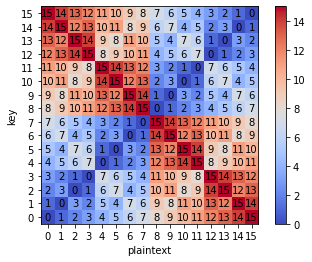

In [4]:
z = []
for i in range(16):
    zi = []
    for j in range(16):
        zi.append(b2d(c[i][j]))
    z.append(zi)

fig, ax = plt.subplots()
im = ax.imshow(z, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(i, j, z[i][j], ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)
plt.show()

And we can construct a bigger heatmap with 1000-bits XOR encryption scheme to see the the result.

Note: to make it more efficient, we use numba to accelerate the calculation.

In [5]:
from numba import njit, prange

In [6]:
@njit
def xorCipher_kernel(n):
    c = []
    for i in prange(n):
        ci = []
        for j in prange(n):
            ci.append(i^j)
        c.append(ci)
    return c

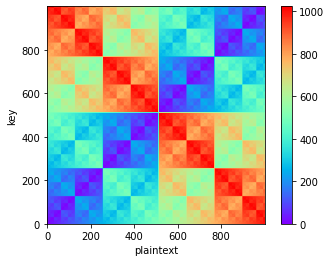

In [7]:
cn = xorCipher_kernel(1000)

fig, ax = plt.subplots()
im = ax.imshow(cn, origin='lower', cmap='rainbow')
ax.set_xlabel('plaintext')
ax.set_ylabel('key')
fig.colorbar(im)
plt.show()

We can see that it presents a fractal pattern which is so-called [Bitwise Fractals](https://icefractal.com/articles/bitwise-fractals/).

Back to the 4-bits case, we can calculate the information properties of the plaintexts, keys and ciphertexts.

### Entropy

In [8]:
from src.entropy import entropy

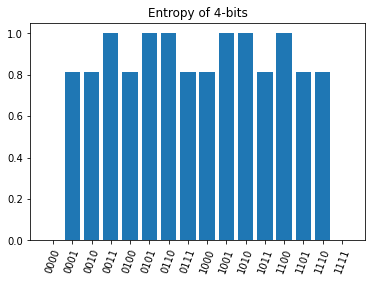

In [9]:
entropy_0 = []
for i in range(16):
    entropy_0.append(entropy(p[i]))

fig, ax = plt.subplots()

ax.bar(range(16),entropy_0)
ax.set_xticks(range(16))
ax.set_xticklabels(['0000','0001','0010','0011',
                    '0100','0101','0110','0111',
                    '1000','1001','1010','1011',
                    '1100','1101','1110','1111'],
                   rotation=70)
ax.set_title('Entropy of 4-bits')
plt.show()

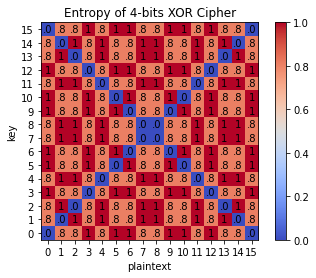

In [10]:
entropy_cipher = []
for i in range(16):
    ei = []
    for j in range(16):
        ei.append(entropy(c[i][j]))
    entropy_cipher.append(ei)
    
fig, ax = plt.subplots()
im = ax.imshow(entropy_cipher, origin='lower', cmap='coolwarm')
for i in range(16):
    for j in range(16):
        text = ax.text(i, j, f'{"."+f"{entropy_cipher[i][j]*10:.0f}" if entropy_cipher[i][j]<1 else 1}', ha="center", va="center", color="k")
ax.set_xticks(range(16))
ax.set_xlabel('plaintext')
ax.set_yticks(range(16))
ax.set_ylabel('key')
fig.colorbar(im)

ax.set_title('Entropy of 4-bits XOR Cipher')
plt.show()